In [ ]:
# 環境の問題：　 libiomp5.dylib というファイルがダブってる。その対応
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

## データのダウンロード

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 画像の型確認

In [ ]:
import numpy as np

print("X_train:",x_train.shape, "y_train:", y_train.shape)
print("X_test:",x_test.shape, "y_test:", y_test.shape)

X_train: (50000, 32, 32, 3) y_train: (50000, 1)
X_test: (10000, 32, 32, 3) y_test: (10000, 1)


## 画像の描画

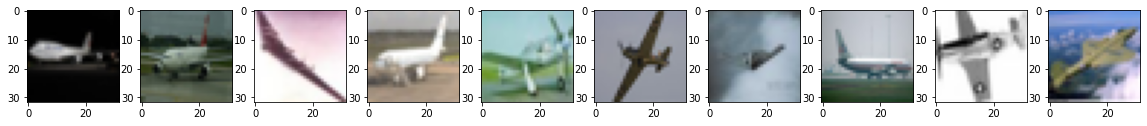

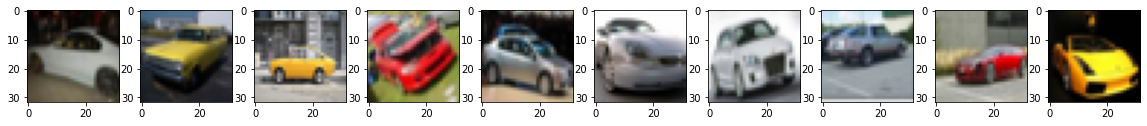

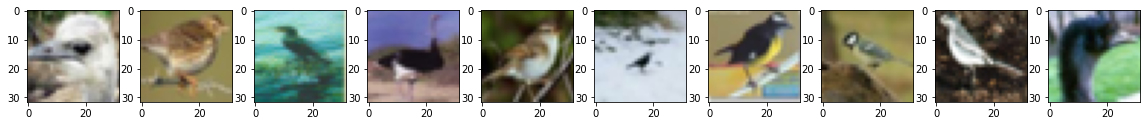

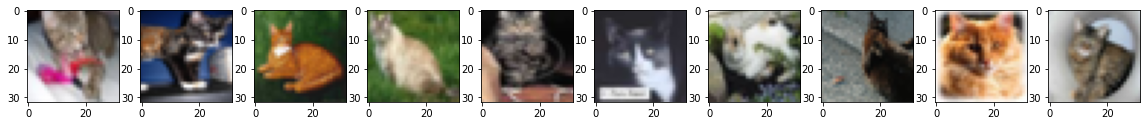

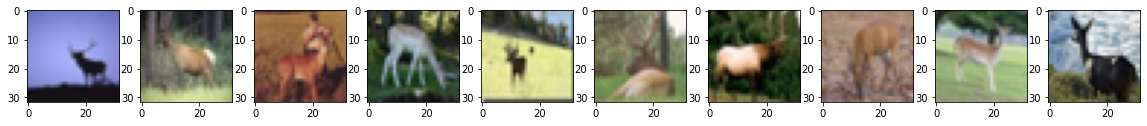

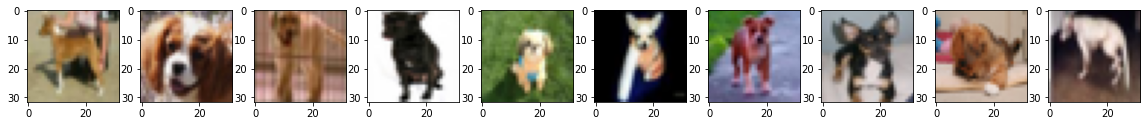

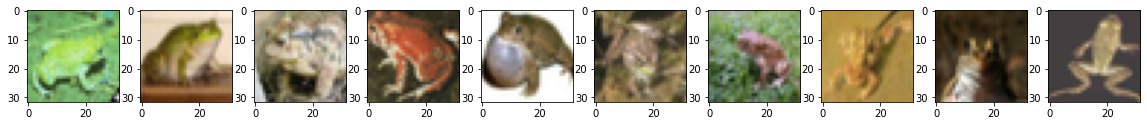

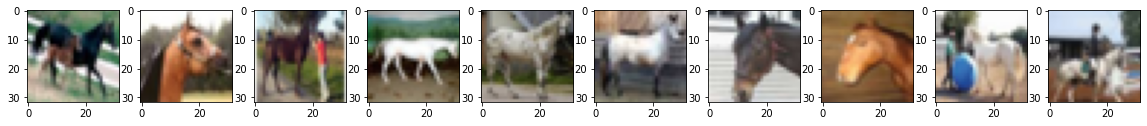

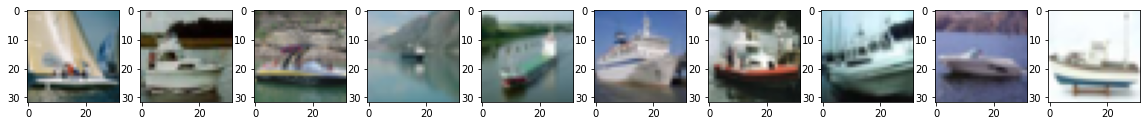

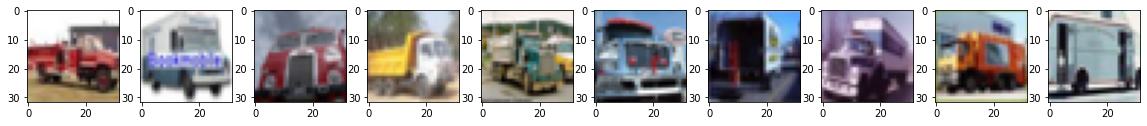

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

num_classes = 10
pos = 1

for target_class in range(num_classes):
    target_idx = [] # 各クラスに分類される画像のインデックスを保持するリスト
    
    # クラスiが正解の場合の正解ラベルのインデックスを表示する
    for i in range(len(y_train)):
        if y_train[i][0] == target_class:
            target_idx.append(i)
            
    np.random.shuffle(target_idx) # クラスiの画像のインデックスをシャッフル
    plt.figure(figsize=(20,20)) # 描画エリアを横20cm, 縦20cmにする
    
    # シャッフルした最初の10枚の画像を描画
    for idx in target_idx[:10]:
        plt.subplot(10, 10, pos) # 10行、10列の描画領域のpos番目の位置を指定
        plt.imshow(x_train[idx])
        pos += 1
        
plt.show()

## 前処理

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

x_train = x_train.astype("float32")
x_train /= 255.0
x_test = x_test.astype("float32")
x_test /= 255.0

y_train, y_test = to_categorical(y_train), to_categorical(y_test)

mean = np.mean(x_train)
std = np.std(x_train)
x_train, x_test = (x_train - mean)/(std + 1e-7), (x_test - mean)/(std + 1e-7)
print(x_train, x_test, y_train, y_test)

[[[[-0.9619317  -0.9151664  -0.899578  ]
   [-1.2113466  -1.1645813  -1.1801698 ]
   [-1.1022277  -1.1334045  -1.2113466 ]
   ...
   [ 0.58132315  0.17602396 -0.19809851]
   [ 0.48779258  0.06690482 -0.2916291 ]
   [ 0.42543885  0.05131639 -0.27604067]]

  [[-1.6322343  -1.5698806  -1.5698806 ]
   [-1.8816491  -1.8816491  -1.8816491 ]
   [-1.6010574  -1.7569418  -1.8816491 ]
   ...
   [ 0.03572796 -0.50986713 -1.0242854 ]
   [-0.02662576 -0.58780926 -1.1022277 ]
   [ 0.02013953 -0.52545553 -0.9931086 ]]

  [[-1.4919384  -1.5075269  -1.5542921 ]
   [-1.6322343  -1.7725302  -1.8816491 ]
   [-1.1178161  -1.4607615  -1.7569418 ]
   ...
   [-0.0422142  -0.57222086 -1.1022277 ]
   [-0.01103733 -0.57222086 -1.1022277 ]
   [-0.18251008 -0.7436936  -1.226935  ]]

  ...

  [[ 1.3607447   0.76838434 -0.38515967]
   [ 1.2516257   0.503381   -1.3516425 ]
   [ 1.2048604   0.6280885  -1.47635   ]
   ...
   [ 0.6125      0.1916124  -0.7904589 ]
   [-1.008697   -1.3984078  -1.7725302 ]
   [-1.0554624  

## モデルの構築

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D # convolution layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers, optimizers


# 正則化のハイパーパラメータを設定
weight_decay = 1e-4

model = Sequential()
# 層1
model.add(
        Conv2D(filters=32,
                       kernel_size=(3,3),
                      padding="same",
                      input_shape=x_train[0].shape,
                      kernel_regularizer=regularizers.l2(weight_decay),
                      activation="relu"
                      ))

model.add(BatchNormalization())
# 層2
model.add(
        Conv2D(filters=32,
                       kernel_size=(3,3),
                      padding="same",
                      kernel_regularizer=regularizers.l2(weight_decay),
                      activation="relu"
                      ))
model.add(BatchNormalization())
# プーリング層
model.add(
        MaxPooling2D(pool_size=(2,2)))
# ドロップアウト
model.add(Dropout(0.2))

# 層4
model.add(
        Conv2D(filters=64,
                      kernel_size=(3,3),
                      kernel_regularizer=regularizers.l2(weight_decay),
                      padding="same",
                      activation="relu"
                      ))
model.add(BatchNormalization())
# 層5
model.add(
        Conv2D(filters=64,
                       kernel_size=(3,3),
                      padding="same",
                      kernel_regularizer=regularizers.l2(weight_decay),
                      activation="relu"
                      ))
model.add(BatchNormalization())
# 層6
# プーリング層
model.add(
        MaxPooling2D(pool_size=(2,2)))
# ドロップアウト
model.add(Dropout(0.3))

# 層7
model.add(
        Conv2D(filters=128,
                       kernel_size=(3,3),
                      padding="same",
               kernel_regularizer=regularizers.l2(weight_decay),
                      activation="relu"
                      ))
model.add(BatchNormalization())

# 層8
model.add(
        Conv2D(filters=128,
                       kernel_size=(3,3),
                      padding="same",
                       kernel_regularizer=regularizers.l2(weight_decay),
                      activation="relu"
                      ))
model.add(BatchNormalization())

# 層9
model.add(
        MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Flatten
model.add(Flatten())

# 層10
# 全結合層
model.add(Dense(128,
                               activation="relu"
                               ))
# ドロップアウト
model.add(Dropout(0.4))
# 出力層
model.add(Dense(10,
                              activation="softmax"))
# compile
model.compile(
        loss="categorical_crossentropy", 
        optimizer=optimizers.Adam(lr=0.001), # Adamを使用
        metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## 学習率を自動で減衰させる仕組みを導入する。
## 指定したepoch数以内に学習の進捗が見られない場合に、学習率を減衰させる。
## 学習が停滞した場合に、学習率の引き下げは有効なので、早期終了の時よりも良い結果が期待できる。

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
        monitor="val_accuracy", # 監視対象は検証データの精度
        factor=0.5, # 学習率を減衰させる割合
        patience=5, # 監視対象のエポック数
        verbose=1, # 学習率を下げたときに通知する
        mode="max", # 最高値を監視する
        min_lr=0.0001 # 学習率の下限
        )
callbacks_list = [reduce_lr]

## データの拡張

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        featurewise_center=True, # データセット全体の平均値を取得
        featurewise_std_normalization=True, # データを標準化する
        width_shift_range=0.1, # 横サイズの0.1の割合でランダムに水平移動
        height_shift_range=0.1, # 縦サイズの0.1の割合でランダムに垂直移動
        rotation_range=10, # 10度の範囲でランダムに回転させる
        zoom_range=0.1, # ランダムに拡大
        horizontal_flip=True) # 左右反転

test_datagen = ImageDataGenerator(
        featurewise_center=True, # データセット全体の平均値を取得
        featurewise_std_normalization=True # データを標準化する
)

train_datagen.fit(x_train)
test_datagen.fit(x_test)


training_epochs = 100
batch_size = 64
# ジェネレーターにミニバッチを適合させる
# 訓練データ
train_generator = train_datagen.flow(
        x_train,
        y_train,
        batch_size=batch_size
        )
# 検証データ
validation_generator = test_datagen.flow(
        x_test,
        y_test,
        batch_size=batch_size
        )



## 学習の実行

In [ ]:
%%time

training_epochs = 120
batch_size = 64

# 学習を行う
history = model.fit(
        train_generator,
        epochs=training_epochs,
        verbose=1,
        validation_data=validation_generator,
        callbacks=[reduce_lr]
)

score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/120
782/782 [==============================] - 25s 30ms/step - loss: 1.8561 - accuracy: 0.3376 - val_loss: 1.6334 - val_accuracy: 0.4387
Epoch 2/120
782/782 [==============================] - 25s 32ms/step - loss: 1.4711 - accuracy: 0.4826 - val_loss: 1.3757 - val_accuracy: 0.5517
Epoch 3/120
782/782 [==============================] - 24s 31ms/step - loss: 1.2875 - accuracy: 0.5624 - val_loss: 1.1307 - val_accuracy: 0.6184
Epoch 4/120
782/782 [==============================] - 24s 31ms/step - loss: 1.1453 - accuracy: 0.6191 - val_loss: 0.9849 - val_accuracy: 0.6874
Epoch 5/120
782/782 [==============================] - 23s 30ms/step - loss: 1.0663 - accuracy: 0.6546 - val_loss: 1.0171 - val_accuracy: 0.6948
Epoch 6/120
782/782 [==============================] - 25s 31ms/step - loss: 1.0110 - accuracy: 0.6800 - val_loss: 0.9074 - val_accuracy: 0.7234
Epoch 7/120
782/782 [==============================] - 24s 30ms/step - loss: 0.9686 - accuracy: 0.7000 - val_loss: 0.8834 - val_ac

## 損失と精度の推移をグラフに

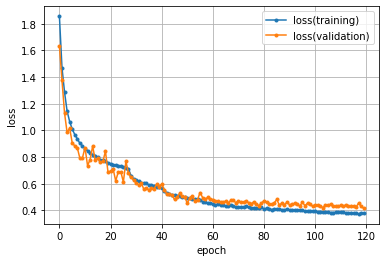

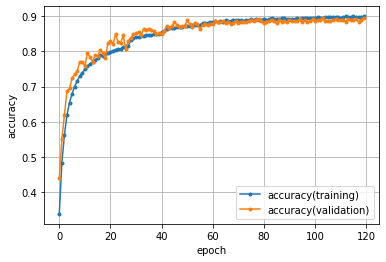

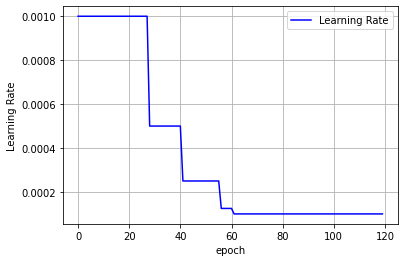

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# 損失
plt.plot(history.history["loss"],
         marker=".",
                label="loss(training)",
                )

plt.plot(history.history["val_loss"],
         marker=".",
                label="loss(validation)",
                )
plt.legend(loc="best")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# 正解率
plt.plot(history.history["accuracy"],
         marker=".",
                label="accuracy(training)",
                )

plt.plot(history.history["val_accuracy"],
            marker=".",
                label="accuracy(validation)",
                )
plt.legend(loc="best")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

# 学習率
plt.plot(history.history["lr"],
                label="Learning Rate",
                 color="blue"
                )

plt.legend()
plt.grid()
plt.xlabel("epoch")
plt.ylabel("Learning Rate")
plt.show()

## 双方のグラフが離れることなく同じように進んでいることから、オーバフィッティングが発生することなくfitできたと考えられます。

## 学習結果を保存

In [ ]:
with open("model.json", "w")  as json_file:
    json_file.write(model.to_json()) # モデルをJSON形式に変換して保存
    
model.save_weights("weight.h5") # HD5形式で保存

## 学習済みモデルを読み込んでテストデータで検証する

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def draw(x):
    plt.figure(figsize=(10,10))
    pos = 1
    for i in range(x.shape[0]):
        plt.subplot(4,5,pos)
        plt.imshow(x[i])
        plt.axis("off")
        pos += 1
    plt.show()

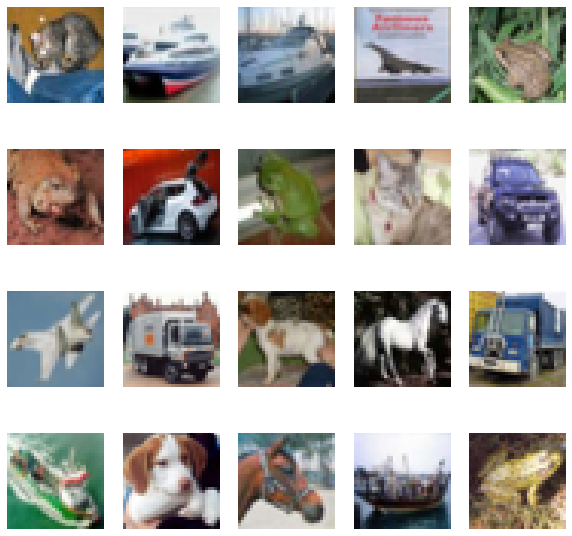

['dog', 'dog', 'truck', 'automobile', 'ship', 'automobile', 'dog', 'automobile', 'automobile', 'dog', 'automobile', 'truck', 'automobile', 'dog', 'automobile', 'ship', 'dog', 'automobile', 'automobile', 'truck']


In [ ]:
import numpy as np
from tensorflow.keras.models import model_from_json


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# テストデータの先頭から20枚を描画
draw(x_test[:20])

# モデルの読み込み
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
model= model_from_json(loaded_model_json)
# 重みの読み込み
model.load_weights("weight.h5")


# 正解ラベルのテキスト
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 学習済みモデルで予測する
indices = np.argmax(model.predict(x_test[:20]),1)
print([labels[x] for x in indices])

